In [43]:
import pandas as pd

In [45]:
df = pd.read_csv('PolyData.csv')

In [47]:
x =df['x'].values.reshape(-1 ,1)

y =df['y'].values.reshape(-1 ,1)

In [48]:
from sklearn.model_selection import train_test_split
xtrain ,xtest ,ytrain ,ytest = train_test_split(x ,y ,test_size=0.2)

In [50]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(xtrain ,ytrain)
pred = lr.predict(xtest)

In [51]:
from sklearn.metrics import r2_score
r2_score(ytest ,pred)

0.15918341397765634

In [52]:
import matplotlib.pyplot as plt

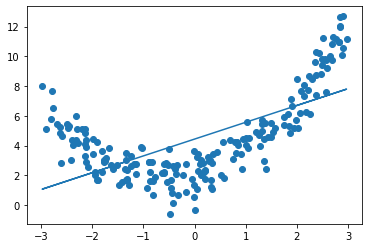

In [55]:
plt.plot(xtrain ,lr.predict(xtrain))
plt.scatter(x ,y)

In [56]:
from sklearn.preprocessing import StandardScaler ,PolynomialFeatures

In [57]:
poly = PolynomialFeatures(degree=2)

In [58]:
xtr = poly.fit_transform(xtrain)
xte = poly.transform(xtest)

In [59]:
lr.fit(xtr ,ytrain)

LinearRegression()

In [60]:
pred = lr.predict(xte)
r2_score(ytest ,pred)

0.8546182171626611

In [62]:
import numpy as np

In [72]:
xnew = np.linspace(-3 , 3 ,200).reshape(200,1)
xpo = poly.transform(xnew)

ynew = lr.predict(xpo)

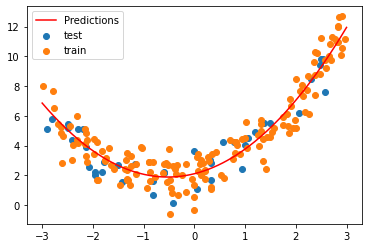

In [76]:
plt.plot(xnew,ynew,"r-",label ="Predictions")
plt.scatter(xtest,ytest,label = "test")
plt.scatter(xtrain,ytrain,label= "train")
plt.legend()
plt.show()

In [79]:
def pols(de):
    xnew = np.linspace(-3 ,3 ,200).reshape(200 ,1)
    
    
    polyn = PolynomialFeatures(degree = de)
    std = StandardScaler()
    lr = LinearRegression()
    
    model = Pipeline([
        ('poly' ,polyn),
        ('std' ,std),
        ('line' ,lr)
    ])
    
    model.fit(x ,y)
    pred = model.predict(xnew)
    plt.plot(xnew ,pred)
    
    plt.scatter(x ,y)

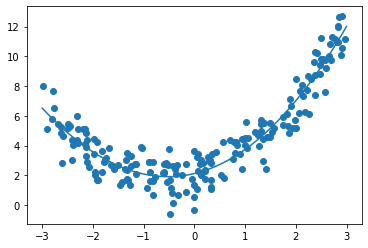

In [80]:
pols(3)